# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = requests.get(query_url + city).json()


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url + city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()
        time.sleep(0.5)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | acapulco
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | linqu
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | tabuk
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | beba
Processing Record 16 of Set 1 | cape canaveral
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tera
Processing Record 19 of Set 1 | kampot
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | neyshabur
Processing Record 22 of Set 1 | lubbock
Processing Record 23 of Set 1 | pray

Processing Record 36 of Set 4 | karwar
Processing Record 37 of Set 4 | ambanja
Processing Record 38 of Set 4 | santa maria
Processing Record 39 of Set 4 | ituni
City not found. Skipping...
Processing Record 40 of Set 4 | hermanus
Processing Record 41 of Set 4 | ruhengeri
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | imperial beach
Processing Record 45 of Set 4 | tessalit
Processing Record 46 of Set 4 | nuuk
Processing Record 47 of Set 4 | ordu
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | yulara
Processing Record 0 of Set 5 | wairoa
Processing Record 1 of Set 5 | merauke
Processing Record 2 of Set 5 | tezu
Processing Record 3 of Set 5 | boende
Processing Record 4 of Set 5 | pauini
Processing Record 5 of Set 5 | eyl
Processing Record 6 of Set 5 | belem de sao francisco
Processing Record 7 of Set 5 | padang
Processing Record 8 of Set 5 | sola
Processing Record 9 of Set 5 | porto velho

Processing Record 28 of Set 8 | usogorsk
Processing Record 29 of Set 8 | kudahuvadhoo
Processing Record 30 of Set 8 | yinchuan
Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | bilibino
Processing Record 33 of Set 8 | plettenberg bay
Processing Record 34 of Set 8 | aleppo
Processing Record 35 of Set 8 | savannakhet
Processing Record 36 of Set 8 | buala
Processing Record 37 of Set 8 | aiquile
Processing Record 38 of Set 8 | kaeo
Processing Record 39 of Set 8 | anchorage
Processing Record 40 of Set 8 | willowmore
Processing Record 41 of Set 8 | enid
Processing Record 42 of Set 8 | luau
Processing Record 43 of Set 8 | abu samrah
Processing Record 44 of Set 8 | zhezkazgan
Processing Record 45 of Set 8 | fonseca
Processing Record 46 of Set 8 | talnakh
Processing Record 47 of Set 8 | mangit
Processing Record 48 of Set 8 | tigil
Processing Record 49 of Set 8 | cabo san lucas
Processing Record 0 of Set 9 | barentu
Processing Record 1 of Set 9 | chimoio
Processing Record 2 of 

Processing Record 15 of Set 12 | yining
Processing Record 16 of Set 12 | puerto madryn
Processing Record 17 of Set 12 | saint-augustin
Processing Record 18 of Set 12 | saleaula
City not found. Skipping...
Processing Record 19 of Set 12 | sherlovaya gora
Processing Record 20 of Set 12 | sete lagoas
Processing Record 21 of Set 12 | hovd
Processing Record 22 of Set 12 | baker city
Processing Record 23 of Set 12 | maumere
Processing Record 24 of Set 12 | marathopolis
City not found. Skipping...
Processing Record 25 of Set 12 | chuy
Processing Record 26 of Set 12 | solnechnyy
Processing Record 27 of Set 12 | meulaboh
Processing Record 28 of Set 12 | newala
Processing Record 29 of Set 12 | hofn
Processing Record 30 of Set 12 | itarema
Processing Record 31 of Set 12 | bada
Processing Record 32 of Set 12 | san pedro
Processing Record 33 of Set 12 | toftir
City not found. Skipping...
Processing Record 34 of Set 12 | ios
Processing Record 35 of Set 12 | bonavista
Processing Record 36 of Set 12 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esperance,-33.8667,121.9000,17.47,70,0,3.80,AU,1681339618
1,acapulco,16.8634,-99.8901,30.90,62,0,5.14,MX,1681339609
2,hilo,19.7297,-155.0900,25.85,75,75,4.63,US,1681339620
3,fortuna,40.5982,-124.1573,11.19,61,11,4.92,US,1681339621
4,port alfred,-33.5906,26.8910,18.86,63,100,3.55,ZA,1681339621


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esperance,-33.8667,121.9000,17.47,70,0,3.80,AU,1681339618
1,acapulco,16.8634,-99.8901,30.90,62,0,5.14,MX,1681339609
2,hilo,19.7297,-155.0900,25.85,75,75,4.63,US,1681339620
3,fortuna,40.5982,-124.1573,11.19,61,11,4.92,US,1681339621
4,port alfred,-33.5906,26.8910,18.86,63,100,3.55,ZA,1681339621


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

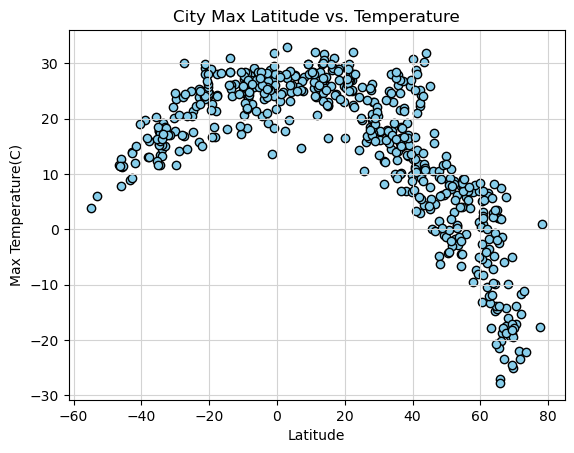

In [10]:
# Build scatter plot for latitude vs. temperature

temperature = city_data_df["Max Temp"]
latitude = city_data_df["Lat"]

# Incorporate the other graph properties

plt.scatter(latitude,temperature,edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

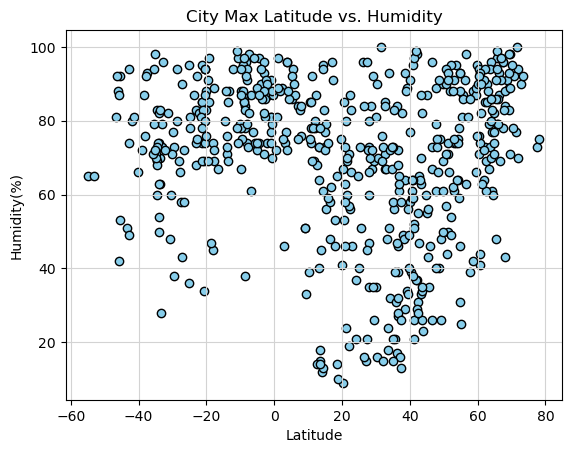

In [11]:
# Build the scatter plots for latitude vs. humidity

humidity = city_data_df["Humidity"]
# Incorporate the other graph properties
plt.scatter(latitude,humidity,edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Max Latitude vs. Humidity")
plt.grid(which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

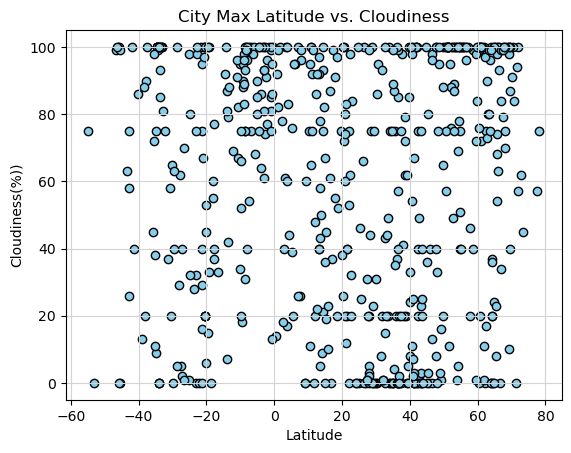

In [12]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"] 

# Incorporate the other graph properties
plt.scatter(latitude,cloudiness,edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%))")
plt.title("City Max Latitude vs. Cloudiness")
plt.grid(which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

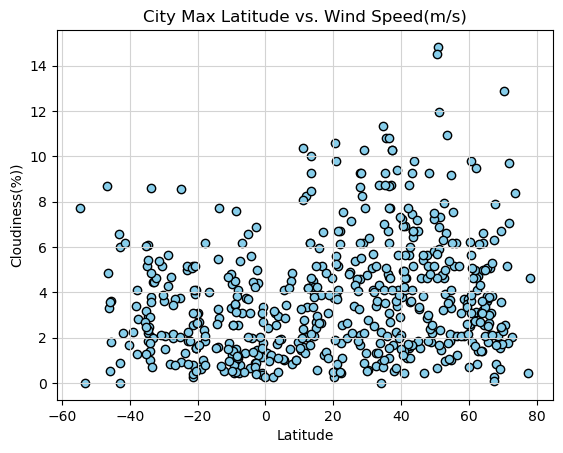

In [13]:
# Build the scatter plots for latitude vs. wind speed
# 
wind_speed = city_data_df["Wind Speed"] 
# Incorporate the other graph properties
plt.scatter(latitude,wind_speed,edgecolors="black",facecolors="skyblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%))")
plt.title("City Max Latitude vs. Wind Speed(m/s)")
plt.grid(which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,acapulco,16.8634,-99.8901,30.90,62,0,5.14,MX,1681339609
2,hilo,19.7297,-155.0900,25.85,75,75,4.63,US,1681339620
3,fortuna,40.5982,-124.1573,11.19,61,11,4.92,US,1681339621
5,linqu,36.5156,118.5397,14.90,39,85,4.69,CN,1681339622
7,albany,42.6001,-73.9662,24.23,65,2,3.55,US,1681339349


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esperance,-33.8667,121.9000,17.47,70,0,3.80,AU,1681339618
4,port alfred,-33.5906,26.8910,18.86,63,100,3.55,ZA,1681339621
6,hobart,-42.8794,147.3294,14.03,94,75,0.00,AU,1681339623
8,cape town,-33.9258,18.4232,17.99,74,0,2.06,ZA,1681339409
10,ushuaia,-54.8000,-68.3000,3.81,65,75,7.72,AR,1681339626


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.742354069559399
The correlation between both factors is -0.86


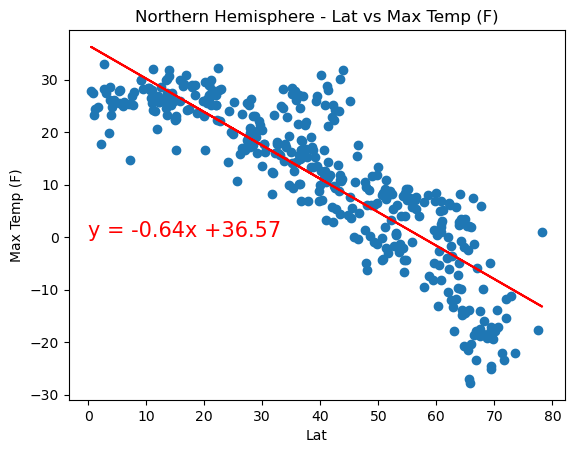

In [29]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.show()


The r-squared is: 0.574748666402166
The correlation between both factors is 0.76


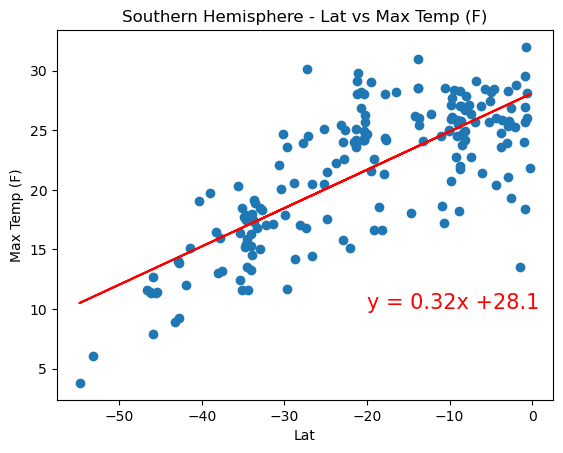

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Southern",(-20, 10))
plt.show()


**Discussion about the linear relationship:** There is the strong correlation between latitude and temperature. the closer we get to equaiter the weather is warmer. also, correlation in North hemisphere is stronger than south hemispher. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.047467820447965624
The correlation between both factors is 0.22


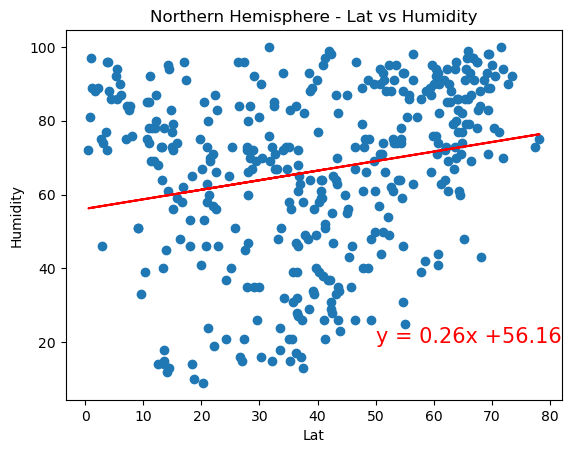

In [32]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity", "Northern",(50, 20))
plt.show()


The r-squared is: 0.0965785758407781
The correlation between both factors is 0.31


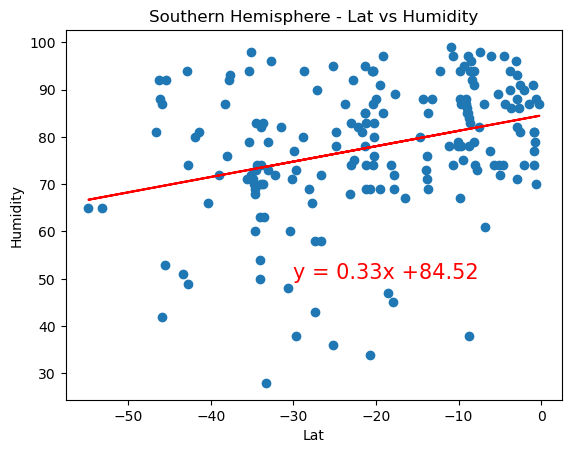

In [33]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Lat", "Humidity", "Southern",(-30, 50))
plt.show()


**Discussion about the linear relationship:** there is not a strong correlation between humidity and latitude. especially in Southern Hemisphere vs. northern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02491225750632833
The correlation between both factors is 0.16


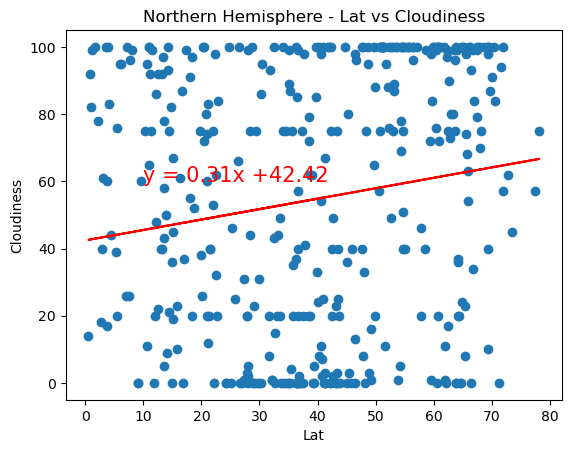

In [34]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness", "Northern",(10, 60))
plt.show()


The r-squared is: 0.0548793690543588
The correlation between both factors is 0.23


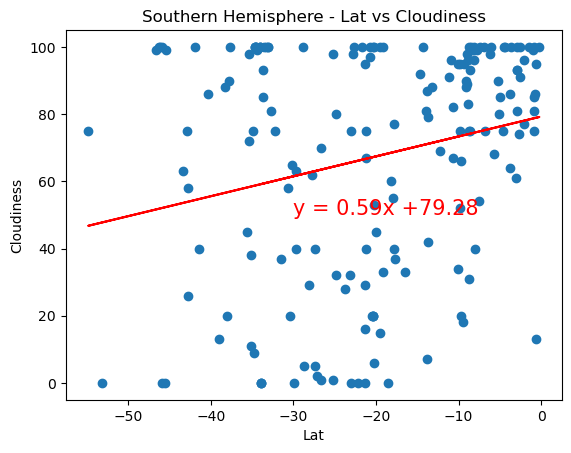

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Lat", "Cloudiness", "Southern",(-30, 50))
plt.show()


**Discussion about the linear relationship:** there isn't any strong relationship between cloudiness vs latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004753020296996419
The correlation between both factors is 0.07


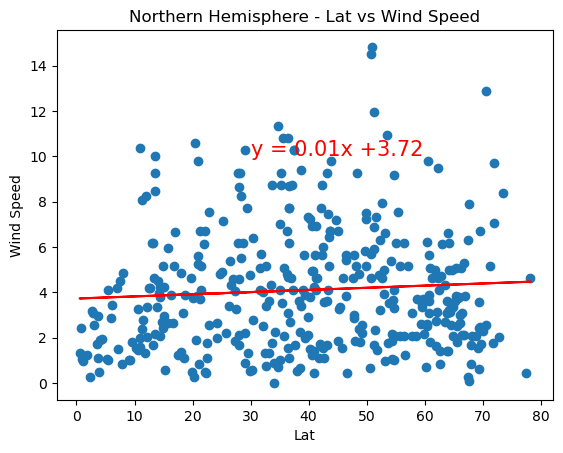

In [36]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed", "Northern",(30, 10))
plt.show()


The r-squared is: 0.0414136867453692
The correlation between both factors is -0.2


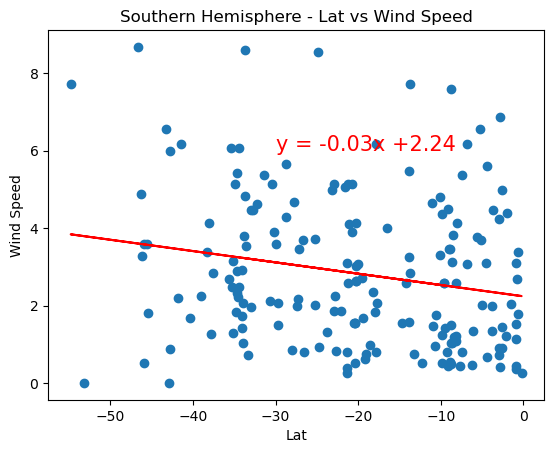

In [38]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Lat", "Wind Speed", "Southern",(-30, 6))
plt.show()

**Discussion about the linear relationship:** there is not a strong correlation between Wind speed and Latitude. 